In [155]:
import numpy as np
import pandas as pd
import yfinance as yf

In [156]:
ticker_df = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]

In [157]:
ticker_df.head()

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,ADP,ADP,Information Technology,Data Processing & Outsourced Services
3,Airbnb,ABNB,Consumer Discretionary,Internet & Direct Marketing Retail
4,Align Technology,ALGN,Health Care,Health Care Supplies


In [158]:
tickers = ticker_df.Ticker.to_list()

In [159]:
df = yf.download(tickers, start = '2013-01-01')['Adj Close']

[*********************100%***********************]  101 of 101 completed


<AxesSubplot:xlabel='Date'>

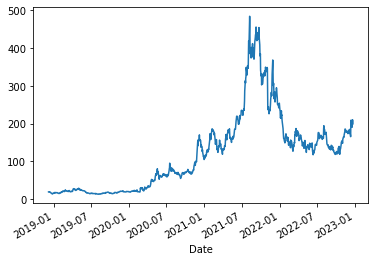

In [160]:
df['MRNA'].plot()

In [161]:
nulls = df.isna().sum().sort_values()

In [162]:
df = df.dropna(axis=1)

In [163]:
df.pct_change()*100

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SNPS,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.262214,-1.538863,-1.613638,0.393869,-1.543042,-0.068692,2.711269,-0.253362,-1.581026,-0.628167,...,-1.177197,-0.721654,-1.668533,-1.299927,1.151361,3.436426,-0.709393,0.076352,-1.152902,-0.292161
2013-01-04,-2.785477,1.006625,-1.778730,0.887089,-0.027491,-0.160496,0.479943,0.000000,4.016060,0.440268,...,-0.783699,1.038416,-1.064151,-0.219481,-0.167925,1.550381,-1.614195,0.839315,-0.210326,0.366283
2013-01-07,-0.588235,-0.498302,0.305740,-0.388947,-0.742576,-0.413325,-1.262364,-1.185458,3.088809,-0.505746,...,-0.726697,-1.747161,-0.174416,0.314261,-0.448614,3.140682,2.286163,-0.242127,-0.038322,-1.058383
2013-01-08,0.269122,0.527150,-1.031625,0.577205,0.581876,-0.507251,-2.384245,-1.371052,0.000000,-0.429224,...,0.127304,-2.405866,-1.921964,-1.159159,1.201657,2.558678,0.368126,2.927788,-0.575042,0.184416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,-1.590959,-2.888875,-1.007078,-0.805507,-2.006237,-0.602728,0.277477,-0.706584,-1.253642,-0.639464,...,-1.741000,-0.519813,-0.239633,-1.144207,-1.028456,-4.333987,0.691422,-6.659938,-2.956288,-0.743702
2022-12-20,-0.052876,2.877476,-0.490491,-0.469270,-0.328840,-0.351066,1.001210,-0.471197,0.712195,-0.357551,...,0.321586,-0.903826,-8.053641,-0.906870,-0.594619,0.562439,0.534077,-2.378381,1.205601,0.129678
2022-12-21,2.380948,0.934304,1.874278,1.283256,2.293528,1.782853,1.758405,2.318842,4.043039,0.570353,...,1.784671,0.805191,-0.166905,1.589499,2.282358,-0.913966,-2.352644,0.110745,-1.167990,1.323940


In [164]:
0.829627 - 1

-0.170373

In [165]:
monthly_return = (df.pct_change() + 1)[1:].resample('M').prod()
monthly_return

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SNPS,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,0.829627,0.986698,0.991818,1.015413,1.052518,1.037572,1.104225,1.090371,1.027668,0.958609,...,1.035936,1.034021,1.060804,1.030381,1.041148,1.025888,1.049921,1.059560,1.009639,1.014609
2013-02-28,0.974714,1.039122,1.044094,1.034913,0.944444,1.044062,1.002551,1.068894,0.957692,1.077095,...,1.047548,0.977069,0.928552,1.040810,1.060007,1.045556,1.031285,1.057077,1.035006,1.033117
2013-03-31,1.002854,1.107097,1.028085,1.067220,1.123366,1.039324,1.065840,0.983224,1.024096,1.119716,...,1.024265,1.112245,1.087855,1.030496,1.053874,1.174071,1.164631,1.073630,1.114668,1.044602
2013-04-30,1.000271,1.035846,0.946225,1.035522,0.954667,1.057577,0.988362,1.076410,1.105882,1.016584,...,0.991360,1.086239,1.424914,1.028551,0.994645,1.397490,1.038381,1.001016,1.016550,1.070371
2013-05-31,1.022420,0.951863,1.051965,1.020493,0.958101,0.899551,1.079408,1.054627,1.418440,0.968947,...,1.024459,1.092253,1.810706,0.991715,0.959700,1.045691,0.970086,1.000634,1.025220,0.903429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.968792,0.910563,0.885434,1.013645,0.932600,1.024625,0.867352,0.889890,0.898380,0.978526,...,0.941551,1.006291,0.927511,0.923528,0.983758,1.004814,0.895423,0.882667,1.060993,1.014621
2022-09-30,0.879023,0.736932,0.919554,0.929452,0.925944,0.862774,0.849856,0.870947,0.746554,0.937994,...,0.882926,0.931995,0.962411,0.936868,0.912665,1.027612,0.895608,0.868580,0.925012,0.867592
2022-10-31,1.109551,1.157340,1.023540,1.068571,1.147216,1.017004,0.938149,1.077627,0.947917,1.199423,...,0.957579,1.129612,0.857832,1.046070,1.072128,1.077571,1.162420,1.130435,1.023650,1.017344


In [166]:
def rolling_returns(df, n):
    return df.rolling(n).apply(np.prod)

In [167]:
#each value represents the pct change over the last 12 months
rolling_returns(monthly_return, 12).head(25)

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SNPS,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
ret_12, ret_6, ret_3 = rolling_returns(monthly_return, 12), rolling_returns(monthly_return, 6), rolling_returns(monthly_return, 3)

In [169]:
#get top 50 stocks from a 12 month return perspective
top_50 = ret_12.loc['2013-12-31'].nlargest(50).index
top_50

Index(['TSLA', 'NFLX', 'MU', 'FANG', 'DXCM', 'TMUS', 'ALGN', 'GILD', 'ILMN',
       'MRVL', 'CSGP', 'META', 'BIIB', 'BKNG', 'CHTR', 'VRTX', 'ENPH', 'AVGO',
       'SGEN', 'NXPI', 'ATVI', 'EA', 'WDAY', 'ADBE', 'AMZN', 'GOOGL', 'GOOG',
       'WBA', 'AMAT', 'AMD', 'REGN', 'ODFL', 'CSX', 'PAYX', 'FISV', 'SBUX',
       'HON', 'CTAS', 'ORLY', 'ADP', 'ASML', 'DLTR', 'LRCX', 'TXN', 'MSFT',
       'ROST', 'WBD', 'MCHP', 'CMCSA', 'ADSK'],
      dtype='object')

In [170]:
top_30 = ret_6.loc['2013-12-31', top_50].nlargest(30).index
top_30

Index(['META', 'NFLX', 'FANG', 'DXCM', 'ALGN', 'MU', 'ADSK', 'NXPI', 'ILMN',
       'GILD', 'AMZN', 'CSGP', 'AVGO', 'BKNG', 'TSLA', 'TMUS', 'FISV', 'CTAS',
       'WBA', 'ADBE', 'BIIB', 'WDAY', 'TXN', 'ODFL', 'GOOGL', 'GOOG', 'PAYX',
       'SGEN', 'CMCSA', 'CSX'],
      dtype='object')

In [171]:
top_10 = ret_3.loc['2013-12-31', top_30].nlargest(10).index
top_10

Index(['ILMN', 'TMUS', 'GOOG', 'GOOGL', 'AMZN', 'DXCM', 'MU', 'FANG', 'NXPI',
       'AVGO'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

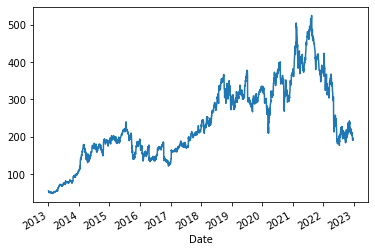

In [172]:
df.ILMN.plot()

In [173]:
def get_portfolio(date):
    #get top 50 stocks from a 12 month return perspective
    top_50 = ret_12.loc[date].nlargest(50).index
    top_30 = ret_6.loc[date, top_50].nlargest(30).index
    top_10 = ret_3.loc[date, top_30].nlargest(10).index

    return top_10



In [174]:
get_portfolio('2022-11-30')

Index(['BIIB', 'GILD', 'ROST', 'REGN', 'LULU', 'ORLY', 'SBUX', 'MCHP', 'PCAR',
       'AMGN'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

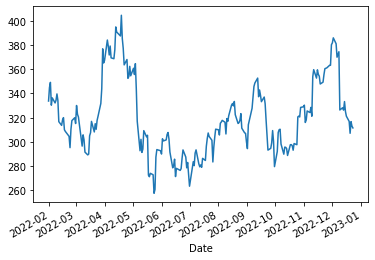

In [175]:
df.loc['2022-1-31':,'LULU'].plot()

In [176]:
portfolio = monthly_return.loc['2022-10-31':,get_portfolio('2022-10-31')][1:2]

<AxesSubplot:xlabel='Date'>

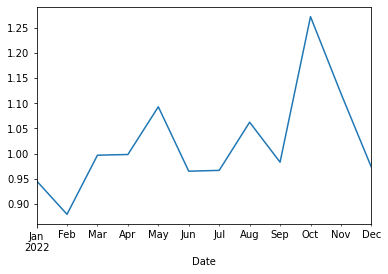

In [177]:
monthly_return.loc['2022-1-31':,'GILD'].plot()

In [178]:
portfolio.mean(axis=1)

Date
2022-11-30    1.052221
Freq: M, dtype: float64

In [199]:
def portfolio_performance(date):
    portfolio = monthly_return.loc[date:,get_portfolio(date)][1:2]
    return portfolio.mean(axis=1).values[0]

In [200]:
portfolio_performance('2022-11-30')

0.9363884181735678

In [201]:
monthly_return

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SNPS,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,0.829627,0.986698,0.991818,1.015413,1.052518,1.037572,1.104225,1.090371,1.027668,0.958609,...,1.035936,1.034021,1.060804,1.030381,1.041148,1.025888,1.049921,1.059560,1.009639,1.014609
2013-02-28,0.974714,1.039122,1.044094,1.034913,0.944444,1.044062,1.002551,1.068894,0.957692,1.077095,...,1.047548,0.977069,0.928552,1.040810,1.060007,1.045556,1.031285,1.057077,1.035006,1.033117
2013-03-31,1.002854,1.107097,1.028085,1.067220,1.123366,1.039324,1.065840,0.983224,1.024096,1.119716,...,1.024265,1.112245,1.087855,1.030496,1.053874,1.174071,1.164631,1.073630,1.114668,1.044602
2013-04-30,1.000271,1.035846,0.946225,1.035522,0.954667,1.057577,0.988362,1.076410,1.105882,1.016584,...,0.991360,1.086239,1.424914,1.028551,0.994645,1.397490,1.038381,1.001016,1.016550,1.070371
2013-05-31,1.022420,0.951863,1.051965,1.020493,0.958101,0.899551,1.079408,1.054627,1.418440,0.968947,...,1.024459,1.092253,1.810706,0.991715,0.959700,1.045691,0.970086,1.000634,1.025220,0.903429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.968792,0.910563,0.885434,1.013645,0.932600,1.024625,0.867352,0.889890,0.898380,0.978526,...,0.941551,1.006291,0.927511,0.923528,0.983758,1.004814,0.895423,0.882667,1.060993,1.014621
2022-09-30,0.879023,0.736932,0.919554,0.929452,0.925944,0.862774,0.849856,0.870947,0.746554,0.937994,...,0.882926,0.931995,0.962411,0.936868,0.912665,1.027612,0.895608,0.868580,0.925012,0.867592
2022-10-31,1.109551,1.157340,1.023540,1.068571,1.147216,1.017004,0.938149,1.077627,0.947917,1.199423,...,0.957579,1.129612,0.857832,1.046070,1.072128,1.077571,1.162420,1.130435,1.023650,1.017344


In [202]:
returns = []
for date in monthly_return.index[:-1]:
    returns.append(portfolio_performance(date))

In [203]:
returns

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0561048407810598,
 1.0840333476657162,
 0.9383742543770481,
 0.9785025565187018,
 1.0275132929048814,
 1.0499704780498154,
 0.9746237796412723,
 1.0957974218771027,
 1.018825526023855,
 1.0319255550201318,
 1.0143788533808837,
 0.9840069072404191,
 1.0287829514766453,
 1.1031283366619515,
 1.0075527613097774,
 0.9648941467112933,
 1.0481649847585097,
 1.0079757426319769,
 1.0778936347917714,
 0.9460120226927111,
 0.9957491800105547,
 1.1110016013131063,
 1.0256534298633204,
 1.0155816772956654,
 0.907564664317692,
 0.9763310512184791,
 1.0812257962180853,
 0.984114956400966,
 1.0982107827425793,
 1.0196584502510952,
 1.0747347432591703,
 1.0430596406849062,
 0.9929046881846533,
 0.9731018287392839,
 1.0434919473793602,
 1.0373479523653795,
 1.0448807527198554,
 1.0416348064653496,
 1.051468622663266,
 1.033230604184985,
 1.058657071325645,
 0.9752955752998471,
 1.0571911507724374,
 1.0128199845006314,
 1.0060637366049

<AxesSubplot:xlabel='Date'>

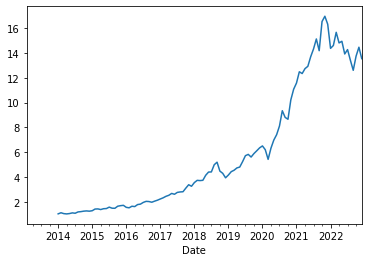

In [209]:
pd.Series(returns, index=monthly_return.index[1:]).cumprod().plot()

<AxesSubplot:xlabel='Date'>

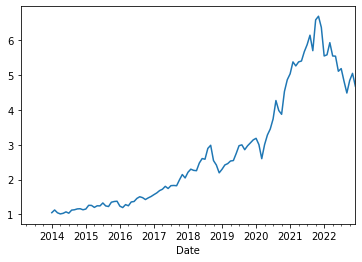

In [208]:
pd.Series([i - 0.01 for i in returns], index=monthly_return.index[1:]).cumprod().plot()